In [44]:
%matplotlib inline
import pandas as pd
import numpy as np

####Why scrape html tables using a lower level api like beautifulsoup or lxml when you can simply use pd.read_html()

In [33]:
wiki_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_Internet_connection_speeds')

#### Returns a list

In [15]:
type(wiki_tables)

list

#### But a list containing what type of data?

In [6]:
type(wiki_tables[0])

pandas.core.frame.DataFrame

In [7]:
wiki_tables[0].head()

,0,1,2
0,Rank,Country/Territory,Avg. connection speed (Mbit/s)[5]
1,-,World average,3.9
2,1,South Korea,23.6
3,2,Japan,14.6
4,3,Hong Kong,13.3


In [48]:
table_final = wiki_tables[0][2:]
table_final.columns = ['rank','region','value']
table_final['region'] = table_final['region'].str.lower()
table_final.replace('united states', 'united states of america', inplace=True)
table_final['value'] = table_final['value'].astype(float)
table_final

/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: 

,rank,region,value
2,1,south korea,23.6
3,2,japan,14.6
4,3,hong kong,13.3
5,4,switzerland,12.7
6,5,netherlands,12.4
7,6,latvia,12.0
8,7,sweden,11.6
9,8,czech republic,11.2
10,9,finland,10.7
11,10,ireland,10.7


In [49]:
table_final.dtypes

rank       object
region     object
value     float64
dtype: object

In [37]:
### load the rpy2 extension
%load_ext rpy2.ipython

In [50]:
%R -i table_final

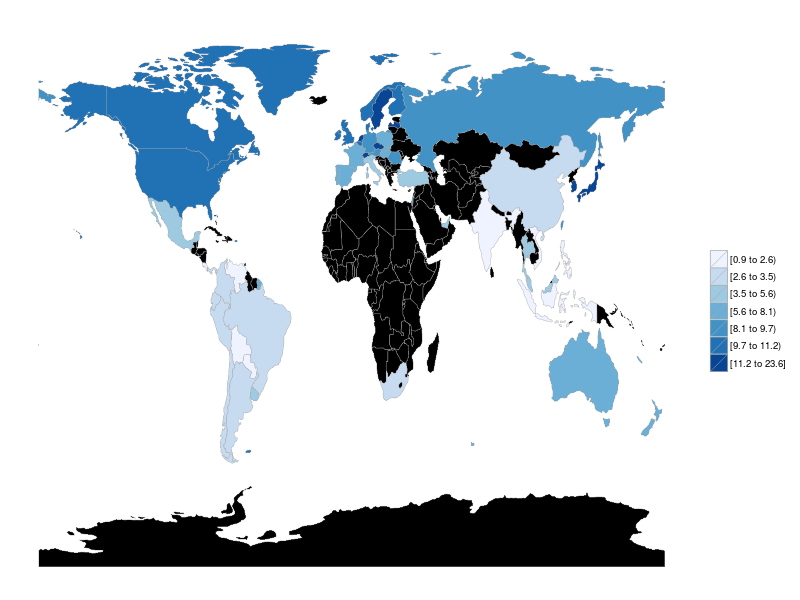

In [51]:
%%R -w 800 -h 600 -u px # instead of px, you can also choose 'in', 'cm', or 'mm'
df <- as.data.frame(table_final)
library(choroplethr)

country_choropleth(table_final)